# RL for Traffic Lights in FLOW

## Testing training scripts

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import flow.networks as networks
from flow.networks import RingNetwork
# input parameter classes to the network class
from flow.core.params import NetParams, InitialConfig
# network-specific parameters
from flow.networks.ring import ADDITIONAL_NET_PARAMS
# vehicles class
from flow.core.params import VehicleParams
# vehicles dynamics models
from flow.controllers import IDMController, ContinuousRouter
from flow.controllers import RLController
from flow.core.params import SumoParams
from flow.core.params import EnvParams

In [ ]:
# Tested tutorial 3 but results were abit off:
# Scripts fomr tutorial 3 is below:

print(networks.__all__)
# ring road network class
network_name = RingNetwork
# name of the network
name = "2_training_example"

sim_params = SumoParams(sim_step=0.1, render=False)
net_params = NetParams(additional_params=ADDITIONAL_NET_PARAMS)

vehicles = VehicleParams()
vehicles.add("human",
             acceleration_controller=(IDMController, {}),
             routing_controller=(ContinuousRouter, {}),
             num_vehicles=21)
vehicles.add(veh_id="rl",
             acceleration_controller=(RLController, {}),
             routing_controller=(ContinuousRouter, {}),
             num_vehicles=1)



# initial configuration to vehicles
initial_config = InitialConfig(spacing="uniform", perturbation=1)

# Define horizon as a variable to ensure consistent use across notebook
HORIZON=3000

env_params = EnvParams(
    # length of one rollout
    horizon=HORIZON,

    additional_params={
        # maximum acceleration of autonomous vehicles
        "max_accel": 1,
        # maximum deceleration of autonomous vehicles
        "max_decel": 1,
        # bounds on the ranges of ring road lengths the autonomous vehicle 
        # is trained on
        "ring_length": [220, 270],
    },
)


import flow.envs as flowenvs

print(flowenvs.__all__)

from flow.envs import WaveAttenuationPOEnv

env_name = WaveAttenuationPOEnv

# Creating flow_params. Make sure the dictionary keys are as specified. 
flow_params = dict(
    # name of the experiment
    exp_tag=name,
    # name of the flow environment the experiment is running on
    env_name=env_name,
    # name of the network class the experiment uses
    network=network_name,
    # simulator that is used by the experiment
    simulator='traci',
    # simulation-related parameters
    sim=sim_params,
    # environment related parameters (see flow.core.params.EnvParams)
    env=env_params,
    # network-related parameters (see flow.core.params.NetParams and
    # the network's documentation or ADDITIONAL_NET_PARAMS component)
    net=net_params,
    # vehicles to be placed in the network at the start of a rollout 
    # (see flow.core.vehicles.Vehicles)
    veh=vehicles,
    # (optional) parameters affecting the positioning of vehicles upon 
    # initialization/reset (see flow.core.params.InitialConfig)
    initial=initial_config
)



In [ ]:
import json

import ray
try:
    from ray.rllib.agents.agent import get_agent_class
except ImportError:
    from ray.rllib.agents.registry import get_agent_class
from ray.tune import run_experiments
from ray.tune.registry import register_env

from flow.utils.registry import make_create_env
from flow.utils.rllib import FlowParamsEncoder

# # number of parallel workers
# N_CPUS = 2
# # number of rollouts per training iteration
# N_ROLLOUTS = 1

# ray.init(num_cpus=N_CPUS)


# # The algorithm or model to train. This may refer to "
# #      "the name of a built-on algorithm (e.g. RLLib's DQN "
# #      "or PPO), or a user-defined trainable function or "
# #      "class registered in the tune registry.")
# alg_run = "PPO"

# agent_cls = get_agent_class(alg_run)
# config = agent_cls._default_config.copy()
# config["num_workers"] = N_CPUS - 1  # number of parallel workers
# config["train_batch_size"] = HORIZON * N_ROLLOUTS  # batch size
# config["gamma"] = 0.999  # discount rate
# config["model"].update({"fcnet_hiddens": [16, 16]})  # size of hidden layers in network
# config["use_gae"] = True  # using generalized advantage estimation
# config["lambda"] = 0.97  
# config["sgd_minibatch_size"] = min(16 * 1024, config["train_batch_size"])  # stochastic gradient descent
# config["kl_target"] = 0.02  # target KL divergence
# config["num_sgd_iter"] = 10  # number of SGD iterations
# config["horizon"] = HORIZON  # rollout horizon

# # save the flow params for replay
# flow_json = json.dumps(flow_params, cls=FlowParamsEncoder, sort_keys=True,
#                        indent=4)  # generating a string version of flow_params
# config['env_config']['flow_params'] = flow_json  # adding the flow_params to config dict
# config['env_config']['run'] = alg_run

# # Call the utility function make_create_env to be able to 
# # register the Flow env for this experiment
# create_env, gym_name = make_create_env(params=flow_params, version=0)

# # Register as rllib env with Gym
# register_env(gym_name, create_env)

In [ ]:
# view results:
plt.figure(2)
%run flow/visualize/plot_ray_results.py "../ray_results/2_training_example/PPO_WaveAttenuationPOEnv-v0_0_2020-06-03_04-46-57z3b937l7/progress.csv" \
episode_reward_mean episode_reward_min episode_reward_max


# tensorboard
# tensorboard --logdir=~/ray_results

In [ ]:
# visualize policy

### Attempt 2: Using training script

In [ ]:
# ran the following
# I changed num_rollouts=1 and iterations to 200
# just to ensure simualtion runs faster

# !python examples/train.py singleagent_ring


<IPython.core.display.Javascript object>


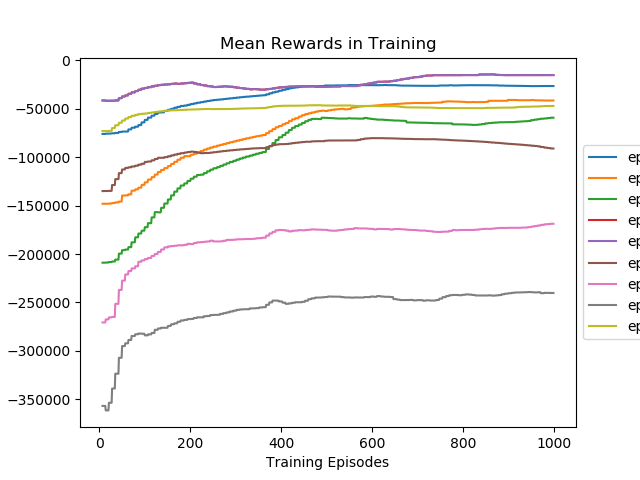

In [36]:
## testing
# 2_stabilizing_the_ring/PPO_WaveAttenuationPOEnv-v0_0_2020-06-03_22-28-035n95xgoz/progress.csv
# view results:
plt.figure(3)
lst = ["grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_01-04-06ec892z38/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-30-14uutqmfdq/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-31-55lc4r9r8k/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-32-49xcr8_c9u/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-33-33hw_i9_zc/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-35-33rwrxapex/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-36-12_et8z98l/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-36-57ruhh67lx/progress.csv",
"grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-37-45ysfdxvmv/progress.csv"]


# %run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_01-04-06ec892z38/progress.csv" \
#     episode_reward_mean
%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-30-14uutqmfdq/progress.csv" \
    episode_reward_mean
%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-31-55lc4r9r8k/progress.csv" \
    episode_reward_mean
%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-32-49xcr8_c9u/progress.csv"  \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-33-33hw_i9_zc/progress.csv"  \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-33-33hw_i9_zc/progress.csv"  \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-35-33rwrxapex/progress.csv" \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-36-12_et8z98l/progress.csv"  \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-36-57ruhh67lx/progress.csv"  \
    episode_reward_mean

%run flow/visualize/plot_ray_results.py "../ray_results/grid-trail/DQN_MyGridEnv-v0_0_2020-06-25_21-37-45ysfdxvmv/progress.csv"  \
    episode_reward_mean


# plt.legend('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Training Episodes")
plt.ylabel("Mean Rewards")
plt.title("Mean Rewards in Training")
plt.savefig("rewards.png")




# !python flow/visualize/visualizer_rllib.py \
# ../ray_results/2_stabilizing_the_ring/PPO_WaveAttenuationPOEnv-v0_0_2020-06-03_22-28-035n95xgoz\
# 200 --horizon 2000

In [28]:
!pwd

/usr/local/google/home/gilbertbahati/flow


# Traffic Lights Optimization

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import minpy.numpy as np
import minpy.numpy.random as random
from minpy.core import grad_and_loss
from examples.utils.data_utils import gaussian_cluster_generator as make_data
from minpy.context import set_context, gpu

from minpy.visualization.writer import LegacySummaryWriter as SummaryWriter
import minpy.visualization.summaryOps as summaryOps

summaries_dir = '/private/tmp/LR_log'
train_writer = SummaryWriter(summaries_dir + '/train')

# Predict the class using multinomial logistic regression (softmax regression).
def predict(w, x):
    a = np.exp(np.dot(x, w))
    a_sum = np.sum(a, axis=1, keepdims=True)
    prob = a / a_sum
    return prob

def train_loss(w, x):
    prob = predict(w, x)
    loss = -np.sum(label * np.log(prob)) / num_samples
    return loss

def train(w, x, loops):
    for i in range(loops):
        dw, loss = grad_function(w, x)
        # gradient descent
        w -= 0.1 * dw
        
        
        if i % 10 == 0:
            print('Iter {}, training loss {}'.format(i, loss))
        summary1 = summaryOps.scalarSummary('loss', loss)
        train_writer.add_summary(summary1, i)
        
        
    train_writer.close()
"""Use Minpy's auto-grad to derive a gradient function off loss"""
grad_function = grad_and_loss(train_loss)

ModuleNotFoundError: No module named 'minpy'

In [ ]:
# Initialize training data.
num_samples = 10000
num_features = 500
num_classes = 5
data, label = make_data(num_samples, num_features, num_classes)

# Initialize training weight and train
weight = random.randn(num_features, num_classes)
train(weight, data, 100)

In [ ]:
!tensorboard --logdir=summaries_dir